# Analysis 2 : 

## Countries with the highest temperature differences
### Let's look at the top 15 countries with highest temperature differences. Temperature difference is the difference between the maximum and minimum temperature value.

In [75]:
#do all the necessary imports
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [76]:
temp_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
#use head or tail methods to get a glimpse of the dataframe
temp_by_country.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [77]:
temp_by_country.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,38.842000,15.003000


In [85]:
temp_by_country.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [86]:
temp_by_country.index

RangeIndex(start=0, stop=577462, step=1)

In [87]:
#for the Country series in the dataframe, get only the unique countries and save it in countries.
temp_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
countries = temp_by_country['Country'].unique()

In [88]:
max_min_list = []
#getting the maximum and the minimu temperatures
#loop through each country and get the temps and append it inside the max_min_list list
for country in countries:
    curr_temps = temp_by_country[temp_by_country['Country'] == country]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))   
#perfor nan cleaning in order to remove data with not a number so that the analysis is more realsitic
res_max_min_list = []
res_countries = []
#use numpy isnan function and run it across the entire list and append it inside the new lists
for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        res_max_min_list.append(max_min_list[i])
        res_countries.append(countries[i])

#calculate the differences in order to get the highest temperature differences in all countries     
differences = []
for tpl in res_max_min_list:
    differences.append(tpl[0] - tpl[1])
    
#sorting - took some help from SO
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences, res_countries), key=lambda pair: pair[0], reverse=True)))

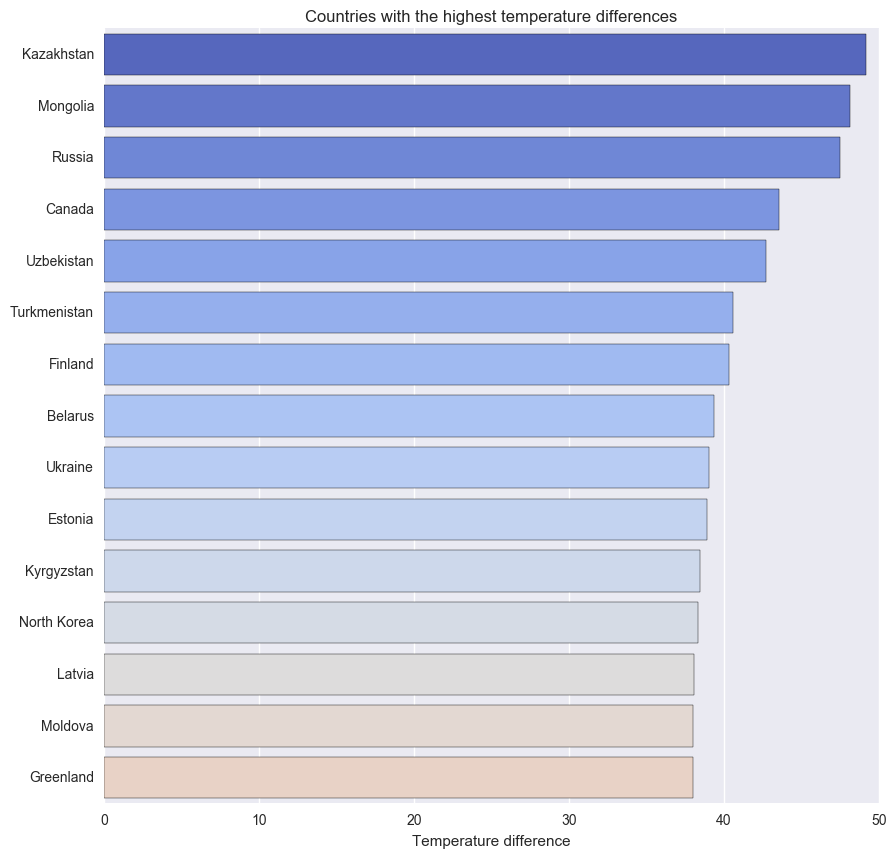

In [90]:
#plotting using seaborn
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=differences[:15], y=res_countries[:15], palette=sns.color_palette("coolwarm", 25), ax=ax)
texts = ax.set(ylabel="", xlabel="Temperature difference", title="Countries with the highest temperature differences")
plt.savefig("./ana_2/countryhighesttempdiff.pdf", bbox_inches='tight')